Joe Freedman - A47774975

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
%matplotlib inline

# Parzen Window

In [3]:
mu1 = 20
sigma1 = math.sqrt(5)
mu2 = 35
sigma2 = math.sqrt(5)

dist1_100 = [np.random.normal(mu1, sigma1) \
            for _ in range(100)]
dist2_100 = [np.random.normal(mu2, sigma2) \
            for _ in range (100)]

dist1_500 = [np.random.normal(mu1, sigma1) \
              for _ in range(500)]
dist2_500 = [np.random.normal(mu2, sigma2) \
              for _ in range (500)]

dist1_1000 = [np.random.normal(mu1, sigma1) \
               for _ in range(1000)]
dist2_1000 = [np.random.normal(mu2, sigma2) \
               for _ in range (1000)]

In [4]:
def phi(u):
    return (1/math.sqrt(2*math.pi))*math.exp(-1*u**2/2)

def Pn(x, l, h):
    n = len(l)
    
    total = 0
    for xi in l:
        total += 1/h*phi((x-xi)/h)
        
    return total/n

In [5]:
h_vals = [0.01, 0.1, 1, 10]
test_vals = list(range(0, 56))

## (a) Plot Estimated Density

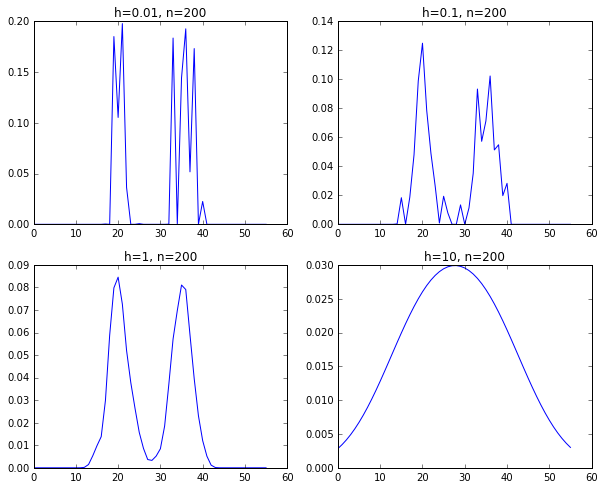

In [6]:
l = dist1_100+dist2_100
fig = plt.figure(figsize=(10, 8))

for a,h in enumerate(h_vals):
    p_list = [Pn(x, l, h) for x in test_vals]
    plt.subplot(2,2,a+1)
    plt.plot(test_vals,p_list)
    plt.title("h={}, n={}".format(h, len(l)))

## (b) Repeat with More Samples

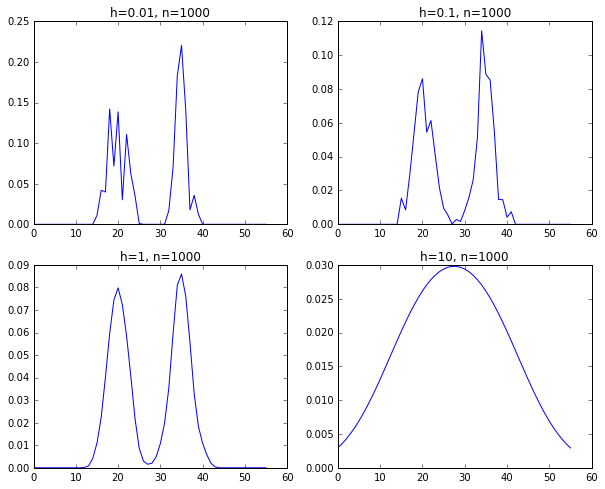

In [7]:
l = dist1_500+dist2_500
fig = plt.figure(figsize=(10, 8))

for a,h in enumerate(h_vals):
    p_list = [Pn(x, l, h) for x in test_vals]
    plt.subplot(2,2,a+1)
    plt.plot(test_vals,p_list)
    plt.title("h={}, n={}".format(h, len(l)))

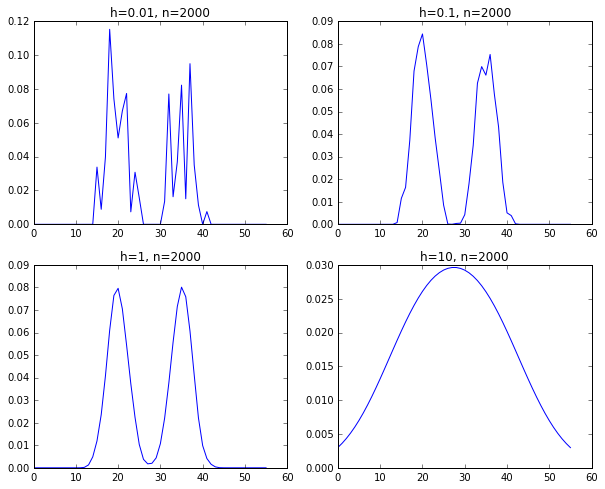

In [8]:
l = dist1_1000+dist2_1000
fig = plt.figure(figsize=(10, 8))

for a,h in enumerate(h_vals):
    p_list = [Pn(x, l, h) for x in test_vals]
    plt.subplot(2,2,a+1)
    plt.plot(test_vals,p_list)
    plt.title("h={}, n={}".format(h, len(l)))

## (c) Discussion

As n and h grow, the estimated bimodal distribution becomes clearer and smoother. h smoothes the curves even without increasing n, however if h gets too large, the estimated distribution becomes unimodal rather than bimodal.

# $\omega_1$, $\omega_2$, and $\omega_3$ Classification

In [9]:
data = pd.read_table("project_data.txt", \
                     names=["x1", "x2", "class"], sep=" ")
class1_train, class1_test = data[data["class"] == 1].head(250), \
data[data["class"] == 1].tail(250)
class2_train, class2_test = data[data["class"] == 2].head(250), \
data[data["class"] == 2].tail(250)
class3_train, class3_test = data[data["class"] == 3].head(250), \
data[data["class"] == 3].tail(250)

In [10]:
def err_conf(mu1, sigma1, mu2, sigma2, mu3, sigma3):
    p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) \
          for row in class1_test.itertuples()]
    p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) \
          for row in class1_test.itertuples()]
    p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) \
          for row in class1_test.itertuples()]
    z1 = zip(p1, p2, p3)

    p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) \
          for row in class2_test.itertuples()]
    p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) \
          for row in class2_test.itertuples()]
    p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) \
          for row in class2_test.itertuples()]
    z2 = zip(p1, p2, p3)

    p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) \
          for row in class3_test.itertuples()]
    p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) \
          for row in class3_test.itertuples()]
    p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) \
          for row in class3_test.itertuples()]
    z3 = zip(p1, p2, p3)

    c11, c12, c13, c21, c22, c23, c31, c32, c33 = [0 for _ in range(9)]

    for v1, v2, v3 in z1:
        if max(v1, v2, v3) == v1:
            c11 += 1
        elif max(v1, v2, v3) == v2:
            c12 += 1
        elif max(v1, v2, v3) == v3:
            c13 += 1

    for v1, v2, v3 in z2:
        if max(v1, v2, v3) == v1:
            c21 += 1
        elif max(v1, v2, v3) == v2:
            c22 += 1
        elif max(v1, v2, v3) == v3:
            c23 += 1

    for v1, v2, v3 in z3:
        if max(v1, v2, v3) == v1:
            c31 += 1
        elif max(v1, v2, v3) == v2:
            c32 += 1
        elif max(v1, v2, v3) == v3:
            c33 += 1

    e = (c12+c13+c21+c23+c31+c32)/(c11+c22+c33+c12+c13+c21+c23+c31+c32)
    print("Error rate: {:.3f}".format(e))

    confusion = np.array([[c11, c12, c13],[c21, c22, c23],[c31,c32,c33]])

    print("\nconfusion matrix =")
    print(confusion)

## (a) Given Paramters and Distributions

In [11]:
m1 = np.array([0,0])
s1 = np.array([[4, 0],[0, 4]])
m2 = np.array([10, 0])
s2 = np.array([[4, 0],[0, 4]])
m3 = np.array([5, 5])
s3 = np.array([[5, 0],[0, 5]])

err_conf(m1, s1, m2, s2, m3,s3)

Error rate: 0.073

confusion matrix =
[[230   4  16]
 [  1 235  14]
 [  9  11 230]]


## (b) MLE Parameters and Given Distributions

In [12]:
m1_mle = np.array([class1_train["x1"].mean(), class1_train["x2"].mean()])
s1_mle = np.array(class1_train.drop("class", axis=1).cov()*(249/250))
m2_mle = np.array([class2_train["x1"].mean(), class2_train["x2"].mean()])
s2_mle = np.array(class2_train.drop("class", axis=1).cov()*(249/250))
m3_mle = np.array([class3_train["x1"].mean(), class3_train["x2"].mean()])
s3_mle = np.array(class3_train.drop("class", axis=1).cov()*(249/250))

err_conf(m1_mle, s1_mle, m2_mle, s2_mle, m3_mle,s3_mle)

Error rate: 0.075

confusion matrix =
[[231   4  15]
 [  1 238  11]
 [ 12  13 225]]


## (c) Estimated Distributions - Parzen Window

In [13]:
def phi(u):
    return (1/(2*math.pi))*math.exp(-1/2*np.dot(np.transpose(u),u))

def Pn(x, l, h):
    n = len(l)
    
    total = 0
    for xirow in l.iterrows():
        total += 1/h*phi(np.array((x-np.array((xirow[1][0], \
                                                xirow[1][1]))))/h)
        
    return total/n

In [14]:
l1 = class1_train.drop("class", axis=1)
l2 = class2_train.drop("class", axis=1)
l3 = class3_train.drop("class", axis=1)

p1 = [Pn(np.array((row[1][0], row[1][1])), l1, 1) \
      for row in class1_test.drop("class", axis=1).iterrows()]
p2 = [Pn(np.array((row[1][0], row[1][1])), l2, 1) \
      for row in class1_test.drop("class", axis=1).iterrows()]
p3 = [Pn(np.array((row[1][0], row[1][1])), l3, 1) \
      for row in class1_test.drop("class", axis=1).iterrows()]
z1 = zip(p1, p2, p3)

p1 = [Pn(np.array((row[1][0], row[1][1])), l1, 1) \
      for row in class2_test.drop("class", axis=1).iterrows()]
p2 = [Pn(np.array((row[1][0], row[1][1])), l2, 1) \
      for row in class2_test.drop("class", axis=1).iterrows()]
p3 = [Pn(np.array((row[1][0], row[1][1])), l3, 1) \
      for row in class2_test.drop("class", axis=1).iterrows()]
z2 = zip(p1, p2, p3)

p1 = [Pn(np.array((row[1][0], row[1][1])), l1, 1) \
      for row in class3_test.drop("class", axis=1).iterrows()]
p2 = [Pn(np.array((row[1][0], row[1][1])), l2, 1) \
      for row in class3_test.drop("class", axis=1).iterrows()]
p3 = [Pn(np.array((row[1][0], row[1][1])), l3, 1) \
      for row in class3_test.drop("class", axis=1).iterrows()]
z3 = zip(p1, p2, p3)

c11, c12, c13, c21, c22, c23, c31, c32, c33 = [0 for _ in range(9)]

for v1, v2, v3 in z1:
    if max(v1, v2, v3) == v1:
        c11 += 1
    elif max(v1, v2, v3) == v2:
        c12 += 1
    elif max(v1, v2, v3) == v3:
        c13 += 1

for v1, v2, v3 in z2:
    if max(v1, v2, v3) == v1:
        c21 += 1
    elif max(v1, v2, v3) == v2:
        c22 += 1
    elif max(v1, v2, v3) == v3:
        c23 += 1

for v1, v2, v3 in z3:
    if max(v1, v2, v3) == v1:
        c31 += 1
    elif max(v1, v2, v3) == v2:
        c32 += 1
    elif max(v1, v2, v3) == v3:
        c33 += 1

e = (c12+c13+c21+c23+c31+c32)/(c11+c22+c33+c12+c13+c21+c23+c31+c32)
print("Error rate: {:.3f}".format(e))

confusion = np.array([[c11, c12, c13],[c21, c22, c23],[c31,c32,c33]])

print("\nconfusion matrix =")
print(confusion)

Error rate: 0.076

confusion matrix =
[[228   5  17]
 [  1 238  11]
 [ 10  13 227]]


## (d) 1-NN Classification

In [15]:
train = pd.concat([class1_train, class2_train, class3_train])
test = pd.concat([class1_test, class2_test, class3_test])

ground_truth = [row[1][2] for row in test.iterrows()]
predictions = []

for testrow in test.iterrows():
    d = 5000
    predict = None
    x1_test, x2_test = testrow[1][0], testrow[1][1]
    for trainrow in train.iterrows():
        x1_train, x2_train = trainrow[1][0], trainrow[1][1]
        d_new = math.sqrt((x2_test-x2_train)**2+(x1_test-x1_train)**2)
        if d_new < d:
            d = d_new
            predict = trainrow[1][2]
    predictions.append(predict)

In [16]:
c11, c12, c13, c21, c22, c23, c31, c32, c33 = [0 for _ in range(9)]

for g,p in zip(ground_truth, predictions):
    if g == 1:
        if p == 1:
            c11 += 1
        elif p == 2:
            c12 += 1
        elif p == 3:
            c13 += 1
    elif g == 2:
        if p == 1:
            c21 += 1
        elif p == 2:
            c22 += 1
        elif p == 3:
            c23 += 1
    elif g == 3:
        if p == 1:
            c31 += 1
        elif p == 2:
            c32 += 1
        elif p == 3:
            c33 += 1
    
e = (c12+c13+c21+c23+c31+c32)/(c11+c22+c33+c12+c13+c21+c23+c31+c32)
print("Error rate: {:.3f}".format(e))

confusion = np.array([[c11, c12, c13],[c21, c22, c23],[c31,c32,c33]])

print("\nconfusion matrix =")
print(confusion)

Error rate: 0.104

confusion matrix =
[[224   8  18]
 [  1 234  15]
 [ 18  18 214]]


# Feature Selection

## (a) SFS (Size 3)

Start with empty set $$ \{\} $$

Add $x_2$ due to highest accuracy. $$ \{x_2\} = 80\% $$

Add $x_3$ due to highest accuracy combined with $x_2$. $$ \{x_2, x_3\} = 90\% $$

Add $x_4$ due to highest accuracy combined with $x_2$ and $x_3$. $$ \{x_2, x_3, x_4\} = 93\% $$

Final SFS of size 3: $$ \{x_2, x_3, x_4\} $$

The optimal set of size 3 is $$ \{x_1, x_3, x_4\} = 95\% $$

SFS selects the set of size 3 with the second highest accuracy, but it is only $2\%$ less accurate than the optimal.

## (b) SBS (Size 2)

Start with full set $$ \{x_1, x_2, x_3, x_4\} $$

Remove $x_2$ due to highest accuracy without it. $$ \{x_1, x_3, x_4\} = 95\% $$

Remove $x_3$ due to highest accuracy without it. $$ \{x_1, x_4\} = 88\% $$

Final SBS of size 2: $$ \{x_1, x_4\} $$

The optimal set of size 2 is $$ \{x_2, x_3\} = 90\% $$

SBS selects the set of size 2 with the second highest accuracy, but it is only $2\%$ less accurate than the optimal.

## (c) SFFS (Size 3)

Start with empty set $$ \{\} $$

Add $x_2$ due to highest accuracy. $$ \{x_2\} = 80\% $$

Add $x_3$ due to highest accuracy combined with $x_2$. $$ \{x_2, x_3\} = 90\% $$

Add $x_4$ due to highest accuracy combined with $x_2$ and $x_3$. $$ \{x_2, x_3, x_4\} = 93\% $$

Conditional exclude step does not remove any features because the previous best set of 2 $\{x_2, x_3\} = 90\%$ was already the best. So final SFFS of size 3 (Same as SFS): $$ \{x_2, x_3, x_4\} $$

The optimal set of size 3 is $$ \{x_1, x_3, x_4\} = 95\% $$

SFFS selects the set of size 3 with the second highest accuracy, but it is only $2\%$ less accurate than the optimal. 

## (d) Discussion

1. Curse of dimensionality. For the fixed training data, at some point, adding features will not increase (and could decrease) the classification accuracy.
2. A feature could have a relationship with another feature which could skew the accuracy.